# Example Image Captioning with `ClipCap`

In [2]:
import os
import numpy as np
import tensorflow as tf

from loggers import set_level
from models import get_pretrained
from utils import normalize_filename, plot
from utils.image import display_image, load_image
from models.siamese import CLIP
from models.image_captioning import ClipCap

model_name = 'clip_cap'

print('Tensorflow version : {}'.format(tf.__version__))

Tensorflow version : 2.6.2


In [2]:
model = CLIP(
    nom  = 'clip_rn50x4',
    lang = 'en',
    input_size   = 288,
    text_encoder = 'clip',
    pretrained   = 'RN50x4',
    normalize = True
)

When using token / word-level tokenizer, it can be useful to add 'detach_punctuation' in cleaners
Model restoration...
Initializing submodel : `comparator` !
Successfully restored comparator from pretrained_models/clip_rn50x4/saving/comparator.json !
Model clip_rn50x4 initialized successfully !


In [3]:
model = ClipCap(nom = model_name, lang = 'en', pretrained = 'transformer')
print(model)

Using pad_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using mask_token, but it is not set yet.


When using token / word-level tokenizer, it can be useful to add 'detach_punctuation' in cleaners
Loading pretrained weights from pretrained_models\pretrained_weights\transformer_weights.pt
Weights transfered successfully !
Weights transfered successfully !
Initializing model with kwargs : {'model': <custom_architectures.transformers_arch.clip_cap_arch.ClipCap object at 0x000001781FCC30F0>}
Initializing submodel : `model` !
Submodel model saved in pretrained_models\clip_cap\saving\model.json !
Model clip_cap initialized successfully !

========== clip_cap ==========
Sub model model
- Inputs 	: unknown
- Outputs 	: unknown
- Number of layers 	: 2
- Number of parameters 	: 181.960 Millions
- Model not compiled

Transfer-learning from : transformer
Already trained on 0 epochs (0 steps)

- Language : en
- Vocabulary (size = 50257) : ['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ...]
- Embedding's dim : 640
- En

## Model initialization

In [2]:
model = get_pretrained(model_name)

print(model)

When using token / word-level tokenizer, it can be useful to add 'detach_punctuation' in cleaners
Model restoration...
Initializing submodel : `model` !
Successfully restored model from pretrained_models/clip_cap/saving/model.json !
Model clip_cap initialized successfully !

========== clip_cap ==========
Sub model model
- Inputs 	: unknown
- Outputs 	: unknown
- Number of layers 	: 2
- Number of parameters 	: 181.960 Millions
- Model not compiled

Transfer-learning from : transformer
Already trained on 0 epochs (0 steps)

- Language : en
- Vocabulary (size = 50257) : ['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ...]
- Embedding's dim : 640
- Encoder's name : clip_rn50x4



## Prediction

In [5]:
set_level('time')

img_dir  = ''
#filename = os.path.join(img_dir, np.random.choice(os.listdir(img_dir)))

filename = 'lena.jpg'

print(filename)
out = model.predict(filename, max_length = 50, save = False)

lena.jpg
Embedding key embedding is not in data, embedding it !
Timers for logger timer :
- Timers in thread MainThread-15996 :
  - predict : 22.453 sec
- Timers in thread get_input-19440 :
  - embed : 0.179 sec
    - processing executed 2 times : 0.021 sec (0.011 sec / exec)
      - load_image : 0.015 sec
    - encoding : 0.158 sec
      - MHA call : 0.006 sec
        - process_qkv : 0.003 sec
          - split_heads executed 3 times : 0.001 sec (0.000 sec / exec)
        - scaled_dot_product_attention : 0.001 sec
          - compute_attention : 0.001 sec
        - merge_heads : 0.000 sec
- Timers in thread inference-16456 :
  - inference : 22.268 sec
    - infer : 22.267 sec
      - Mapper call : 0.075 sec
        - Transformer block call : 0.073 sec
          - build_mask : 0.000 sec
          - layer call executed 8 times : 0.073 sec (0.009 sec / exec)
            - build_mask executed 8 times : 0.000 sec (0.000 sec / exec)
            - MHA call executed 8 times : 0.053 sec (0.007

Timers for logger timer :
- load_image : 0.002 sec


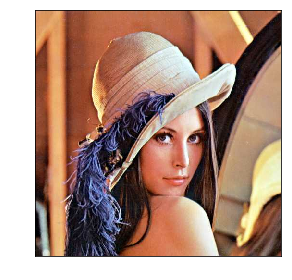

Output #0 : A woman in a hat and a hat with a bow is standing in front of a window.                                                                                                                                   


In [6]:
plot(load_image(filename))
for b, o in enumerate(out):
    beams = o['text'] if isinstance(o['text'], list) else [o['text']]
    for i, beam in enumerate(beams):
        print('Output #{} : {}'.format(i, beam))